# Trabajo Práctico Final: Redes Convolucionales

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import keras
import matplotlib.pyplot as plt

2023-07-28 01:17:17.912123: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-28 01:17:19.070207: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Ejercicio 1

En este ejercicio entrenamos una red convolucional para resolver el problema del dataset CIFAR-10

Primero cargamos el dataset y normalizamos los valores de los pixeles.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

A continuación, creamos la red convolucional con las capas requeridas.

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="SAME"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

Luego, entrenamos el modelo y guardamos el historial en una variable para acceder luego

In [7]:
model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 11s 8ms/step - loss: 1.5980 - accuracy: 0.4061 - val_loss: 1.2756 - val_accuracy: 0.5279
Epoch 2/10
1250/1250 [==============================] - 11s 8ms/step - loss: 1.1581 - accuracy: 0.5844 - val_loss: 1.0351 - val_accuracy: 0.6354
Epoch 3/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9478 - accuracy: 0.6626 - val_loss: 0.9125 - val_accuracy: 0.6818
Epoch 4/10
1250/1250 [==============================] - 11s 8ms/step - loss: 0.8022 - accuracy: 0.7181 - val_loss: 0.8594 - val_accuracy: 0.7008
Epoch 5/10
1250/1250 [==============================] - 11s 8ms/step - loss: 0.7018 - accuracy: 0.7545 - val_loss: 0.8056 - val_accuracy: 0.7234
Epoch 6/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6076 - accuracy: 0.7896 - val_loss: 0.8463 - val_accuracy: 0.7209
Epoch 7/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.5343 - accuracy: 0.8138 - val_loss: 0.8907 - val_ac

Ahora graficamos el error en los conjuntos de entrenamiento y validación

313/313 - 1s - loss: 1.0365 - accuracy: 0.7041 - 923ms/epoch - 3ms/step


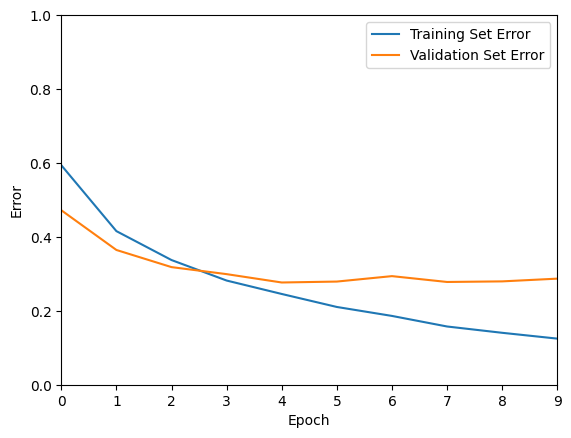

In [8]:
plt.plot([ 1-x for x in history.history['accuracy'] ], label='Training Set Error')
plt.plot([ 1-x for x in history.history['val_accuracy'] ], label = 'Validation Set Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, 9])
plt.ylim([0, 1])
plt.legend()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Vemos que en muy pocas épocas de entrenamiento, el error en el conjunto de validación se estabiliza y luego comienza a subir. Por su parte, el error en el conjunto de entrenamiento si continúa reduciéndose, pero esto sólo quiere decir que se está produciendo sobreajuste, y que esto está impactando en nuestros resultados sobre el conjunto de validación (y por lo tanto, posiblemente en la generalización al conjunto de test).

Por último, imprimiremos el error en el conjunto de entrenamiento:

In [9]:
print(f"Test Set Error: {1 - test_acc}")

Test Set Error: 0.29589998722076416


Como vemos, el error obtenido es similar al del conjunto de validación.

# Ejercicio 2
En este ejercicio analizamos el impacto del uso de la regularización por Dropout en el desempeño de nuestra red convolucional.

Crearemos 2 arquitecturas con Dropout: una con una única capa, y una con dos capas de Dropout. Para cada una de ellas, crearemos dos versiones, una con $p=0.2$ y otra con $p=0.5$. En total tendremos 4 modelos diferentes para comparar.

In [10]:
dropoutModels = []
for useTwoLayers in [False, True]:
  for p in [0.2, 0.5]:
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="SAME"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
    model.add(layers.Dropout(p))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    if useTwoLayers:
      model.add(layers.Dropout(p))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10))
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    dropoutModels.append(model)

A continuación, entrenaremos estos 4 modelos con los mismos parámetros. Luego, graficaremos sus desempeños en los conjuntos de entrenamiento y validación para compararlos.

Epoch 1/20
1250/1250 [==============================] - 12s 9ms/step - loss: 1.7308 - accuracy: 0.3496 - val_loss: 1.3941 - val_accuracy: 0.4855
Epoch 2/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.2805 - accuracy: 0.5369 - val_loss: 1.2326 - val_accuracy: 0.5553
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0849 - accuracy: 0.6128 - val_loss: 1.0340 - val_accuracy: 0.6321
Epoch 4/20
1250/1250 [==============================] - 11s 8ms/step - loss: 0.9619 - accuracy: 0.6617 - val_loss: 0.9489 - val_accuracy: 0.6639
Epoch 5/20
1250/1250 [==============================] - 11s 8ms/step - loss: 0.8592 - accuracy: 0.6976 - val_loss: 0.9240 - val_accuracy: 0.6769
Epoch 6/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7823 - accuracy: 0.7265 - val_loss: 0.8448 - val_accuracy: 0.7082
Epoch 7/20
1250/1250 [==============================] - 11s 8ms/step - loss: 0.7143 - accuracy: 0.7505 - val_loss: 0.8628 - val_ac

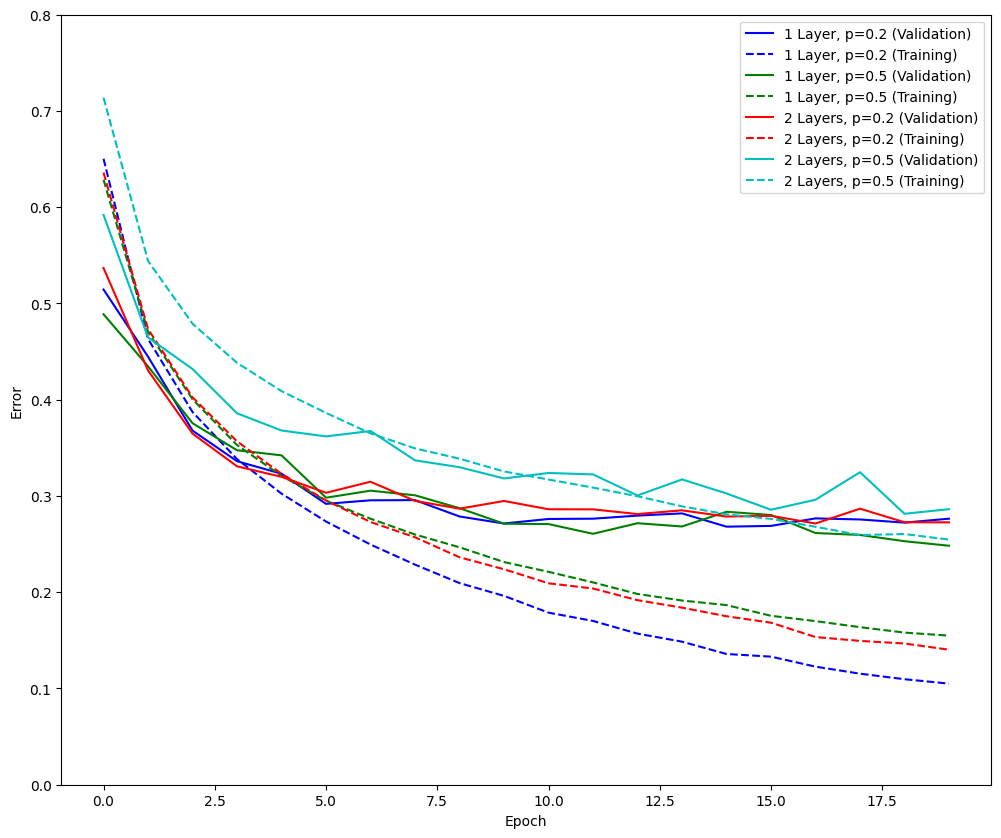

In [11]:
labels=["1 Layer, p=0.2", "1 Layer, p=0.5", "2 Layers, p=0.2", "2 Layers, p=0.5"]
colors=['b', 'g', 'r', 'c']
histories=[]
plt.figure(figsize=(12, 10))
for i, dropoutModel in enumerate(dropoutModels):
  history = dropoutModel.fit(train_images, train_labels, epochs=20, validation_split=0.2)
  histories.append(history)
  plt.plot([ 1-x for x in history.history['val_accuracy'] ], f"{colors[i]}-", label = f"{labels[i]} (Validation)")
  plt.plot([ 1-x for x in history.history['accuracy'] ], f"{colors[i]}--", label=f"{labels[i]} (Training)")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim([0, 0.8])
plt.legend()

Como ilustra el gráfico, el desempeño sobre el conjunto de validación es similar para todos los modelos, sobre todo en las últimas épocas. Destacan el modelo con 2 capas Dropout y $p=0.5$, cuyo error en validación es generalmente el mayor de todos, y el modelo con una única capa Dropout y $p=0.5$, cuyo error suele ser el menor. El primero de estos dos tiene además la particularidad de presentar mucho menos sobreajuste que el resto de modelos, con lo cual es posible que si aumentamos la cantidad de épocas este modelo termine siendo el más adecuado. Más allá de eso, el mínimo error histórico en validación sigue siendo el producido por el modelo con una sóla capa Dropout y $p=0.5$.

Veamos ahora los errores sobre el conjunto de test de cada modelo.

In [11]:
for i, dropoutModel in enumerate(dropoutModels):
  _, acc = dropoutModel.evaluate(test_images,  test_labels, verbose=2)
  print(f"Error for {labels[i]}: {1 - acc}")

313/313 - 1s - loss: 1.1500 - accuracy: 0.7265 - 905ms/epoch - 3ms/step
Error for 1 Layer, p=0.2: 0.2735000252723694
313/313 - 1s - loss: 0.8151 - accuracy: 0.7606 - 898ms/epoch - 3ms/step
Error for 1 Layer, p=0.5: 0.23940002918243408
313/313 - 1s - loss: 0.9404 - accuracy: 0.7236 - 886ms/epoch - 3ms/step
Error for 2 Layers, p=0.2: 0.27640002965927124
313/313 - 1s - loss: 0.8378 - accuracy: 0.7192 - 866ms/epoch - 3ms/step
Error for 2 Layers, p=0.5: 0.2807999849319458


Vemos que los errores en test se asemejan bastante a los errores en validación. Nuevamente, el menor error está dado por el modelo con una sola capa Dropout y $p=0.5$.

# Ejercicio 3
En este ejercicio intentaremos mejorar el desempeño de nuestra red convolucional agregando capas de aumentación de datos.

Análogamente a los ejercicios anteriores, comenzamos creando nuestro modelo. En este ejercicio agregaremos una capa de aumentación de datos, que realizará rotaciones, zoom, y espejados aleatoriamente.

In [6]:
img_height = 32
img_width = 32
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
     ]
)
model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="SAME"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Nuevamente entrenaremos nuestro modelo y graficaremos su desempeño en los conjuntos de entrenamiento y validación.

Epoch 1/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.7997 - accuracy: 0.3288 - val_loss: 1.4631 - val_accuracy: 0.4539
Epoch 2/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.4881 - accuracy: 0.4540 - val_loss: 1.3809 - val_accuracy: 0.4994
Epoch 3/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.3665 - accuracy: 0.5031 - val_loss: 1.2266 - val_accuracy: 0.5651
Epoch 4/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.2913 - accuracy: 0.5317 - val_loss: 1.2870 - val_accuracy: 0.5505
Epoch 5/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.2378 - accuracy: 0.5584 - val_loss: 1.1854 - val_accuracy: 0.5849
Epoch 6/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.1914 - accuracy: 0.5739 - val_loss: 1.2116 - val_accuracy: 0.5849
Epoch 7/20
1250/1250 [==============================] - 14s 12ms/step - loss: 1.1542 - accuracy: 0.5882 - val_loss: 1.2341 -

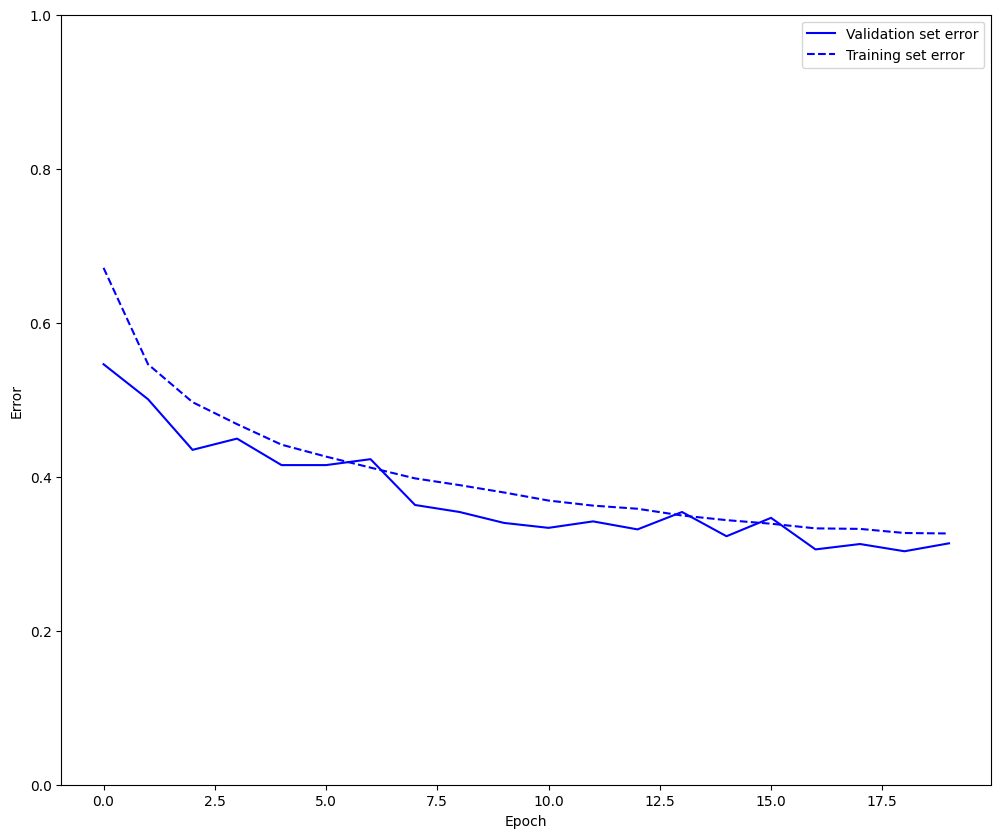

In [7]:
plt.figure(figsize=(12, 10))
history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)
plt.plot([ 1-x for x in history.history['val_accuracy'] ], "b-", label = f"Validation set error")
plt.plot([ 1-x for x in history.history['accuracy'] ], "b--", label="Training set error")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim([0, 1])
plt.legend()
_, acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Error in test set: {1 - acc}")

Quizás sorpresivamente, el gráfico nos muestra que el desempeño sobre el conjunto de validación es peor que cuando no usábamos data augmentation! Sin embargo, tambien podemos ver que el sobreajuste es notablemente menor, incluso haciendo que el desempeño en validación sea mejor al desempeño en training. Es posible que si aumentamos la cantidad de épocas veamos mejores resultados, aunque es dificil saber si llegaremos a resultados mejores que cuando no usábamos data augmentation.

Ahora evaluaremos el desempeño en el conjunto de test:

In [8]:
_, acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test set error: {1 - acc}")

313/313 - 1s - loss: 0.9544 - accuracy: 0.6800 - 941ms/epoch - 3ms/step
Test set error: 0.3199999928474426


Aquí tambien obtenemos un resultado interesante: el desempeño en el conjunto de test resulta ser mejor que el desempeño en validación, si bien no por mucho. Parece ser que nuestro modelo aprende una generalización robusta, si bien pierde un poco de accuracy al introducir la aumentación de datos.

# Ejercicio 4
En este ejercicio proponemos una nueva arquitectura para la red convolucional que nos permita conseguir un mejor desempeño.

El proceso de conseguir un mejor diseño para la red fue, mayormente, de prueba y error.

Una primera heurística fue la de añadir una capa convolucional más al principio, antes de la primer capa de MaxPooling. La idea detrás de esto es que deberíamos aprovechar para conseguir buenos detectores en las primeras etapas, cuando tenemos toda la resolución de nuestra imagen original a su disposición.

Otra intuición fue la de agregar más filtros en alguna capa, para aprender más features diferentes que nos permitan discernir entre las clases. Para este propósito parecía especialmente útil aumentar la cantidad de filtros aprendidos en las últimas capas, para que los nuevos detectores que aprendamos sean de conceptos más complejos.

Por último, el último cambio que se realizó sobre la red fue el de eliminar capas densas al final. No tengo una buena razón por la que esto mejoraba el desempeño del modelo, pero supongo que para este problema simple la cantidad de neuronas en las capas densas era demasiado grande y dificultaba el aprendizaje.

Epoch 1/20
1250/1250 [==============================] - 23s 18ms/step - loss: 1.7076 - accuracy: 0.3696 - val_loss: 1.4614 - val_accuracy: 0.4767
Epoch 2/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.3768 - accuracy: 0.5023 - val_loss: 1.1408 - val_accuracy: 0.5957
Epoch 3/20
1250/1250 [==============================] - 22s 17ms/step - loss: 1.2388 - accuracy: 0.5545 - val_loss: 1.1803 - val_accuracy: 0.5947
Epoch 4/20
1250/1250 [==============================] - 22s 17ms/step - loss: 1.1549 - accuracy: 0.5871 - val_loss: 1.1803 - val_accuracy: 0.5955
Epoch 5/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.0865 - accuracy: 0.6127 - val_loss: 0.9940 - val_accuracy: 0.6524
Epoch 6/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.0410 - accuracy: 0.6333 - val_loss: 1.0135 - val_accuracy: 0.6537
Epoch 7/20
1250/1250 [==============================] - 22s 18ms/step - loss: 0.9922 - accuracy: 0.6496 - val_loss: 0.9881 -

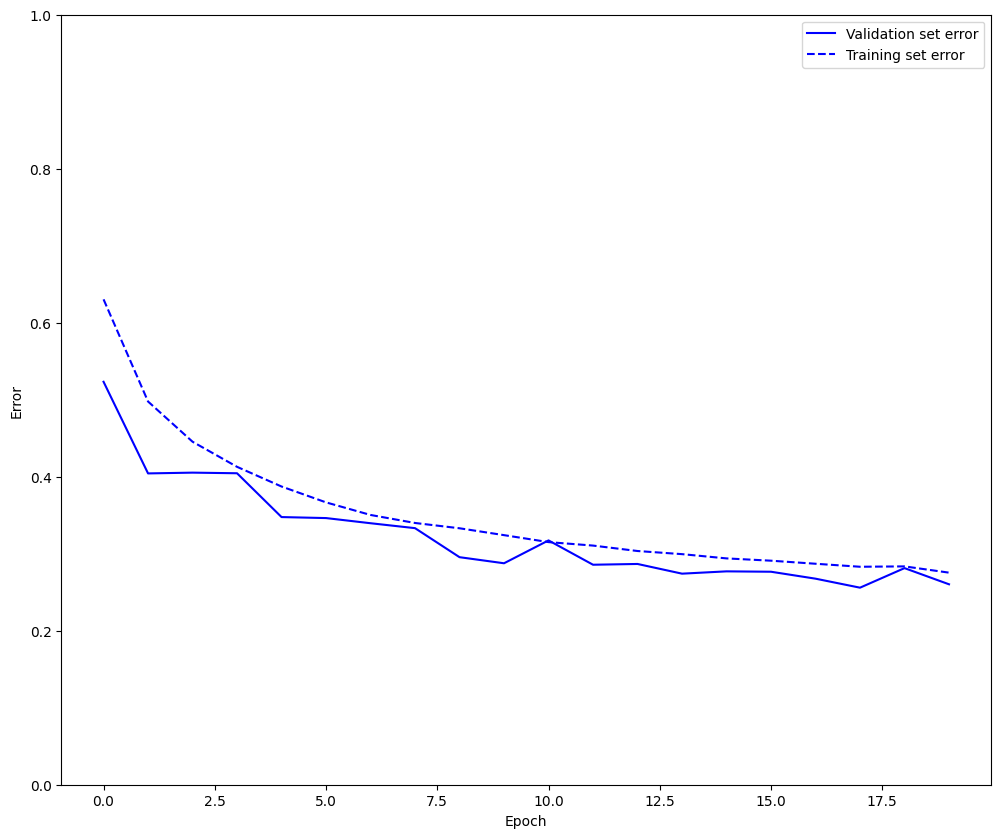

In [6]:
img_height = 32
img_width = 32
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
     ]
)
model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="SAME"))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="SAME"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="SAME"))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="SAME"))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

plt.figure(figsize=(12, 10))
history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)
plt.plot([ 1-x for x in history.history['val_accuracy'] ], "b-", label = f"Validation set error")
plt.plot([ 1-x for x in history.history['accuracy'] ], "b--", label="Training set error")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim([0, 1])
plt.legend()

_, acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Error in test set: {1 - acc}")

Como se puede ver, el error obtenido en el conjunto de test es de 0.26, que es un resultado relativamente bueno comparado a los ejercicios anteriores. Además, no tenemos overfitting, y de hecho vemos que ambas curvas son notablemente similares.

# Ejercicio 5
En este ejercicio realizaremos modificaciones en la capa de aumentación de datos para obtener redes aún más robustas

Valiéndonos de las capas de aumentación de datos provistas por Keras, añadimos dos capas extra, una que cambia aleatoriamente el contraste de la imagen y otra que altera el brillo. Idealmente hubiera preferido usar alguna capa que modifique ligeramente el *hue* de una imagen, pero no encontré una capa de Keras que hiciera eso. Experimentalmente, comprobé que a no ser que se usen valores muy pequeños para estas capas, el modelo no lograba aprender (estaba 5-6 épocas con un accuracy menor a 0.1 que es peor que una elección aleatoria). Ya que estamos añadiendo más aleatoriedad, y en cierto sentido más ejemplos de entrenamiento, decidí entrenar por 40 épocas en este ejercicio, en parte tambien porque esta sería la 'forma final' de nuestro modelo.

Epoch 1/40
1250/1250 [==============================] - 23s 18ms/step - loss: 1.9121 - accuracy: 0.2792 - val_loss: 1.6909 - val_accuracy: 0.3942
Epoch 2/40
1250/1250 [==============================] - 23s 18ms/step - loss: 1.5591 - accuracy: 0.4285 - val_loss: 1.3451 - val_accuracy: 0.5030
Epoch 3/40
1250/1250 [==============================] - 22s 18ms/step - loss: 1.4221 - accuracy: 0.4828 - val_loss: 1.2641 - val_accuracy: 0.5491
Epoch 4/40
1250/1250 [==============================] - 22s 18ms/step - loss: 1.3277 - accuracy: 0.5190 - val_loss: 1.3073 - val_accuracy: 0.5405
Epoch 5/40
1250/1250 [==============================] - 22s 18ms/step - loss: 1.2622 - accuracy: 0.5462 - val_loss: 1.2731 - val_accuracy: 0.5570
Epoch 6/40
1250/1250 [==============================] - 22s 18ms/step - loss: 1.2006 - accuracy: 0.5712 - val_loss: 1.1146 - val_accuracy: 0.6050
Epoch 7/40
1250/1250 [==============================] - 22s 18ms/step - loss: 1.1550 - accuracy: 0.5889 - val_loss: 1.0330 -

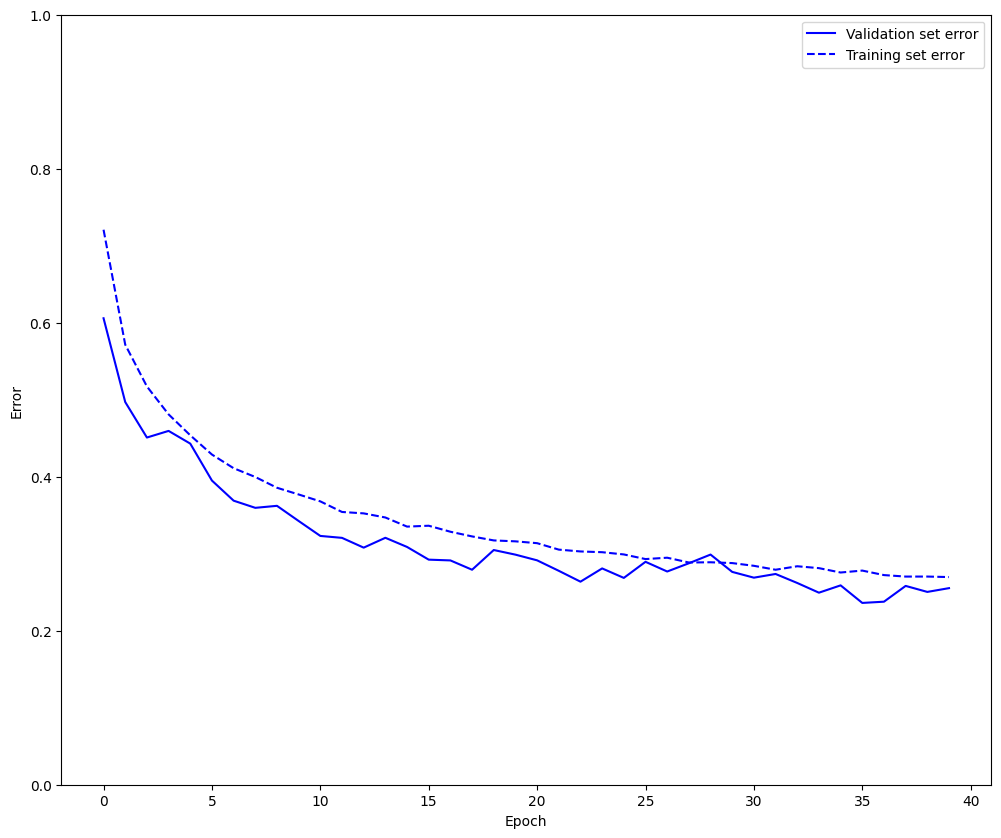

In [12]:
img_height = 32
img_width = 32
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
          layers.RandomContrast(0.001),
          layers.RandomBrightness(0.001),
     ]
)
model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="SAME"))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="SAME"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="SAME"))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="SAME"))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

plt.figure(figsize=(12, 10))
history = model.fit(train_images, train_labels, epochs=40, validation_split=0.2)
plt.plot([ 1-x for x in history.history['val_accuracy'] ], "b-", label = f"Validation set error")
plt.plot([ 1-x for x in history.history['accuracy'] ], "b--", label="Training set error")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim([0, 1])
plt.legend()

_, acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Error in test set: {1 - acc}")

Lamentablemente, el gráfico nos muestra una vez más que el desempeño con más data augmentation parece empeorar en vez de mejorar. Luego de las 40 épocas la red termina con un error similar a los entrenamientos anteriores, pero los modelos anteriores lograban ese error en muchas menos épocas. Además, los modelos anteriores tampoco presentaban una cantidad problemática de sobreajuste, por lo que estos procesos adicionales de aumentación de datos parecieran ser overkill.